**Проектная работа по модулю “Математика и статистика в Python”**

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as sts
import matplotlib.pyplot as plt
%matplotlib inline

1.Загрузить файл hr.csv.

In [14]:
df = pd.read_csv('HR.csv')
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Из необходимых нам метрик в данной таблице есть почти все: минимум (min) и максимум (max) каждой переменной, среднее значение (mean), медиану (50%) и стандартное отклонение (std). Осталось найти моду.

In [5]:
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


3.Рассчитать и визуализировать корреляционную матрицу для переменных.

In [6]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


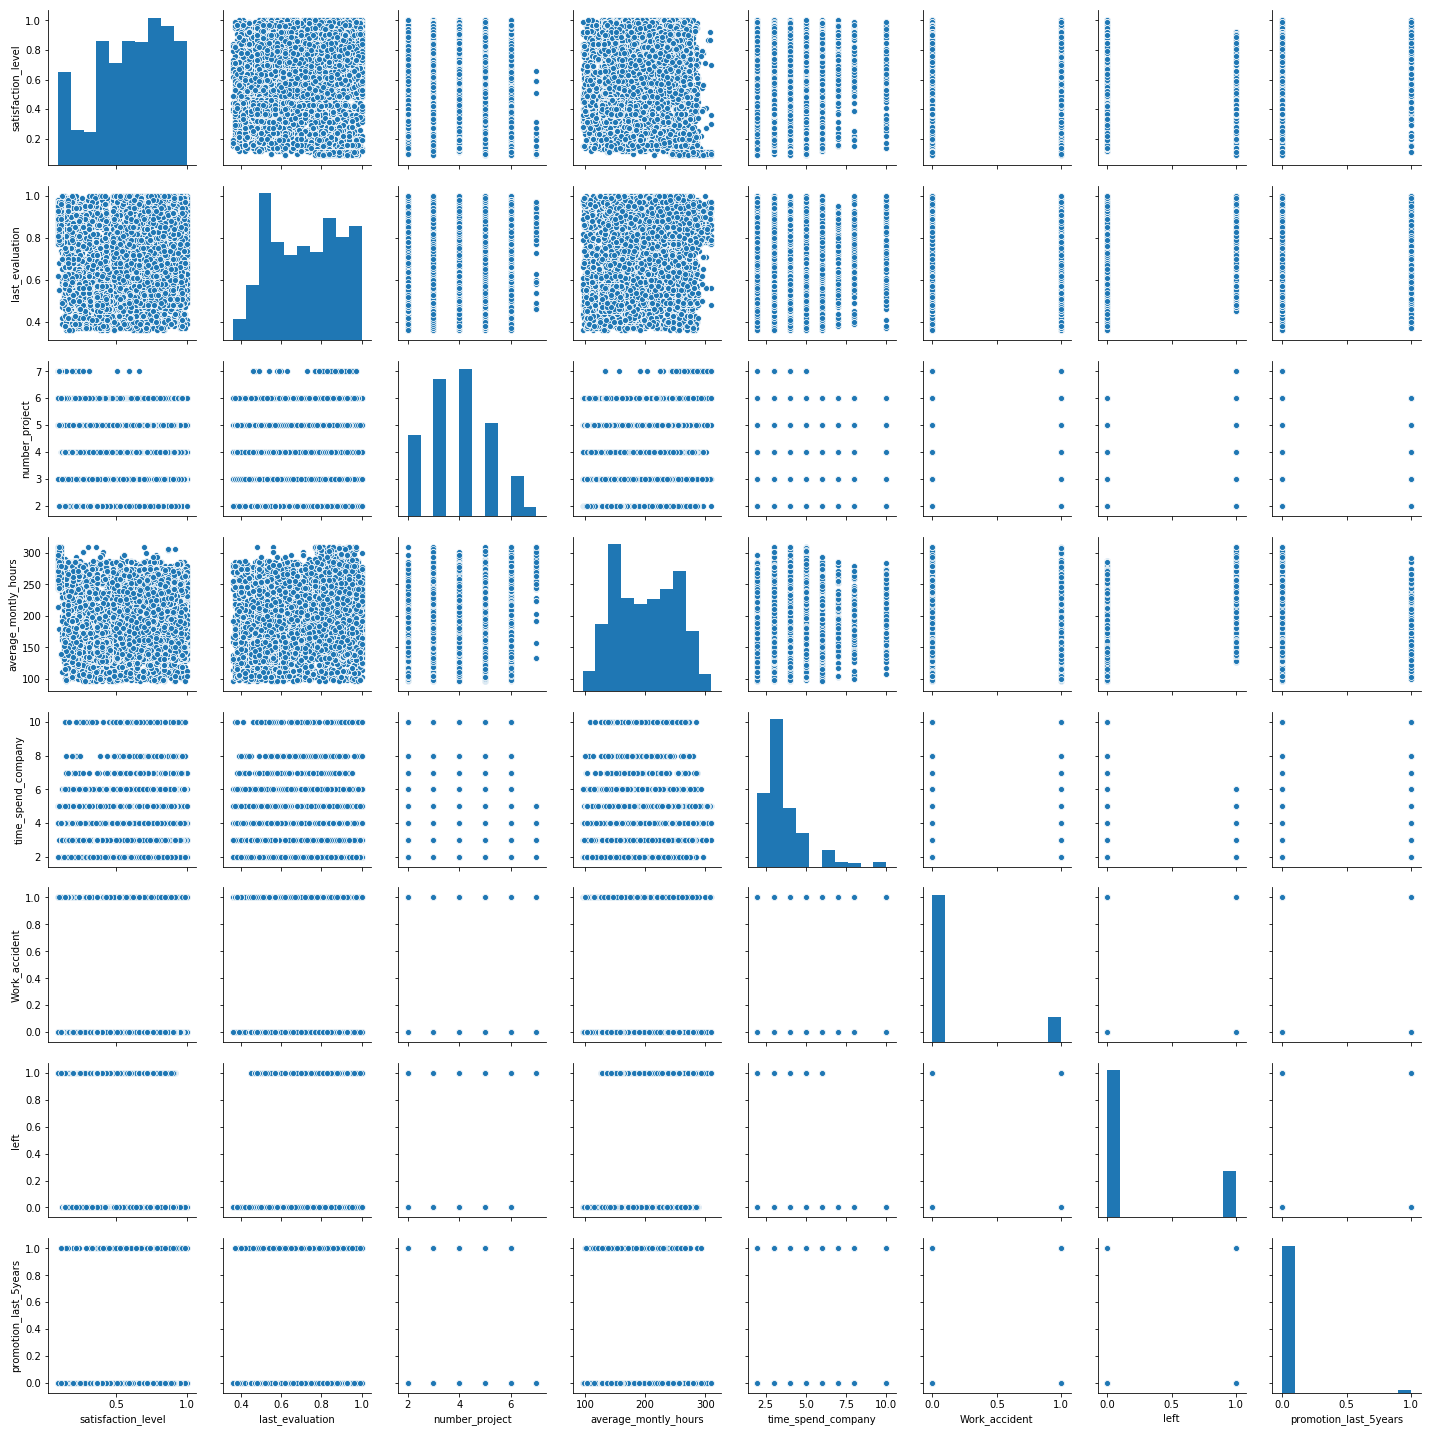

In [7]:
sns.pairplot(df)

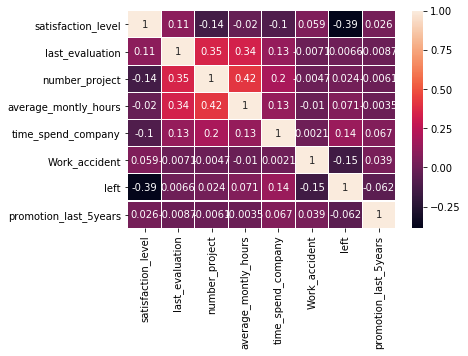

In [8]:
corr_df = df.corr()
sns.heatmap(corr_df, annot=True, linewidths=0.1)

Количество проектов положительно коррелирует со средним количеством часов, которое отработал человек (0,42), а также количество проектов положительно коррелирует с последней оценкой работы (0,34). А уровень удовлетворенности работой отрицательно коррелирует с уходом людей из компании (-0,39).

4.Визуализировать несколько взаимосвязей между переменными.

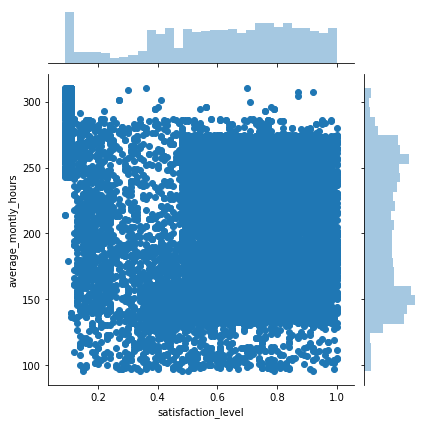

In [87]:
#связь уровня удовлетворенности работой и среднемесячное количество часов, которое он на нее потратил
sns.jointplot(x='satisfaction_level', y='average_montly_hours', 
              data=df, kind='scatter')

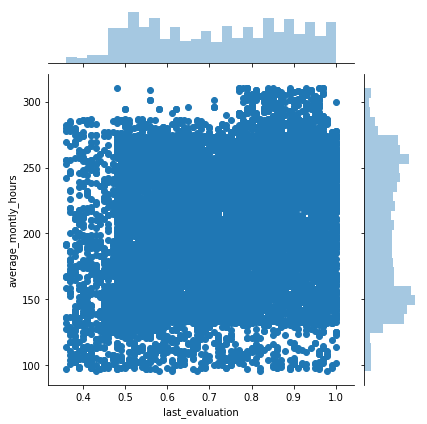

In [85]:
#связь оценки работы сотрудником и количество часов, которые он на нее потратил
sns.jointplot(x='last_evaluation', y='average_montly_hours', 
              data=df, kind='scatter')

(array([ 367., 1240., 2733., 1722., 1628., 1712., 1906., 2240., 1127.,
         324.]),
 array([ 96. , 117.4, 138.8, 160.2, 181.6, 203. , 224.4, 245.8, 267.2,
        288.6, 310. ]),
 <a list of 10 Patch objects>)

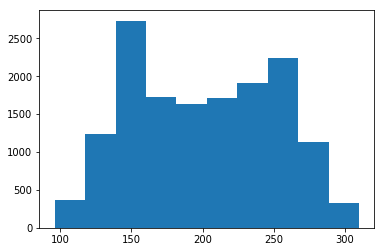

In [81]:
plt.hist(df.average_montly_hours)

In [75]:
df_numpr_avhour = df[['number_project', 'average_montly_hours']].sort_values(['number_project', 'average_montly_hours'], ascending=[False,False])
df_numpr_avhour.head(5)

,number_project,average_montly_hours
566,7,310
809,7,310
1228,7,310
1939,7,310
1963,7,310


Text(0.5, 1.0, 'Взаимосвязь средней продолжительности работы и количества проектов')

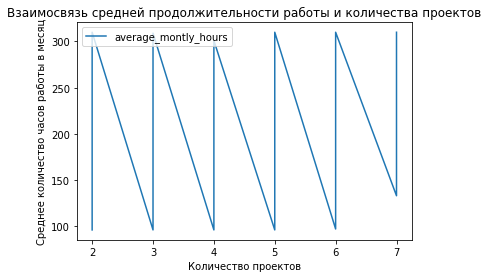

In [76]:
df_numpr_avhour.plot('number_project', 'average_montly_hours')
plt.xlabel('Количество проектов')
plt.ylabel('Среднее количество часов работы в месяц')
plt.title('Взаимосвязь средней продолжительности работы и количества проектов')

! Я так и не поняла, почему не построилась обычная линейная функция... Что я сделала не так?

6.Рассчитать сколько работников работает в каждом департаменте.

In [23]:
df_dep = df.groupby('sales').count().iloc[:,:1].reset_index()
df_dep.columns = ['department','staff_count']
df_dep

,department,staff_count
0,IT,1227
1,RandD,787
2,accounting,767
3,hr,739
4,management,630
5,marketing,858
6,product_mng,902
7,sales,4140
8,support,2229
9,technical,2720


7.Показать распределение сотрудников по зарплатам.

Text(0.5, 1.0, 'Уровень зарплаты сотрудников')

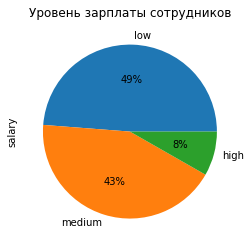

In [30]:
df_sal=df['salary'].value_counts()
df_sal.plot(kind='pie', autopct='%1.0f%%', subplots=True)
plt.title('Уровень зарплаты сотрудников')

8.Показать распределение сотрудников по зарплатам совместно с департаментами.

Text(0.5, 1.0, 'Уровень зарплат в департаментах компании')

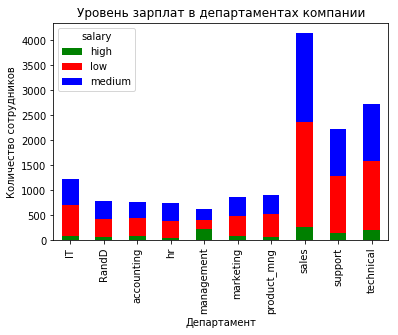

In [45]:
df_sal_sal = df.groupby(['sales', 'salary']).sales.count()
df_sal_sal.unstack().plot(kind='bar', stacked=True, color=['green','red','blue'], grid=False)
plt.xlabel('Департамент')
plt.ylabel('Количество сотрудников')
plt.title('Уровень зарплат в департаментах компании')

9.Сколько сотрудников покинули компанию.

In [50]:
print ('Компанию покинули' , len(df[df['left'] == 1]), 'человек')

Компанию покинули 3571 человек


11.Загрузить результат (в формате .ipynbноутбука) в репозиторий. Разместить ссылку на репозиторий в лк на сайте